In [2]:
import os
!pip install pandas
!pip install matplotlib

In [3]:
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import discriminant_analysis
from sklearn import neighbors
from sklearn import tree
from sklearn import naive_bayes
from sklearn import svm
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from mpl_toolkits import mplot3d


# Importing the dataset (Smartphone-Based Recognition of Human Activities and Postural Transitions)

In [4]:
with open('resources/HAPT Data Set/features.txt', 'r') as f:
    names = f.readlines()
columns_names = []
for name in names: # removes " \n" at the end of the column's name
    name = name.strip()
    columns_names.append(name)


## Cleaning the columns' names

When I tried to add the columns_name array as a parameter of the X_train DataFrame, an error occurred. "ValueError: Duplicate names are not allowed." So I made a for loop that would fill a "pairs" array with the columns' names that appear more than once, to know which column's name needs to be modified.

In [5]:
names_array = []
pairs = []

for name in columns_names:
    if name not in names_array:
        names_array.append(name)
    elif name not in pairs:
        pairs.append(name)
    else:
        pass

def change_end(end_of_name, keep):
    i = 2
    name_before = ''
    beginning_of_name = ''
    for j in range(len(columns_names)):
        if columns_names[j].endswith(end_of_name):
            beginning_of_name = columns_names[j].split("-")[0]
            if beginning_of_name == name_before:
                columns_names[j] = columns_names[j].replace(end_of_name, keep + str(i))
                i += 1
                name_before = beginning_of_name
            else:
                name_before = beginning_of_name
                i = 2
    
def change_end_bis(entire_name):
    i = 1
    while i < 4:
        for j in range(len(columns_names)):
            if columns_names[j] == entire_name:
                columns_names[j] = columns_names[j].replace(columns_names[j][-1], str(i))
                i += 1

change_end('ropy-1', 'ropy-')
change_end_bis('fBodyAcc-Skewness-1')
change_end_bis('fBodyAcc-Kurtosis-1')
change_end_bis('fBodyAccJerk-Skewness-1')
change_end_bis('fBodyAccJerk-Kurtosis-1')
change_end_bis('fBodyGyro-Skewness-1')
change_end_bis('fBodyGyro-Kurtosis-1')

## Importing the dataset (the end)

In [6]:
X_train = pd.read_table("resources/HAPT Data Set/Train/X_train.txt", delimiter=" ", names=columns_names)
Y_train = pd.read_table("resources/HAPT Data Set/Train/y_train.txt", names=['Posture'])

X_test = pd.read_table("resources/HAPT Data Set/Test/X_test.txt", delimiter=" ", names=columns_names)
Y_test = pd.read_table("resources/HAPT Data Set/Test/y_test.txt", names=['Posture'])
# train_df = pd.read_table("resources/HAPT Data Set/Train/X_train.txt", delimiter=" ")
# train_df.columns = [columns_names]
# train_df["Posture"] = pd.read_table("resources/HAPT Data Set/Train/y_train.txt")


## Looking at the data

In [7]:
print("Head of X_train:\n{}".format(X_train.head())) # shows the first 5 rows of the DataFrame
print("Shape of X_train: {}".format(X_train.shape)) # gives the dimensions of the DataFrame
print("Description of X_train:\n{}".format(X_train.describe())) # gives a statistical description of the DataFrame
print("Null values are contained in the DataFrame? {}".format(X_train.isnull().values.any())) # checks if the DataFrame contains null values.

Head of X_train:
   tBodyAcc-Mean-1  tBodyAcc-Mean-2  tBodyAcc-Mean-3  tBodyAcc-STD-1  \
0         0.043580        -0.005970        -0.035054       -0.995381   
1         0.039480        -0.002131        -0.029067       -0.998348   
2         0.039978        -0.005153        -0.022651       -0.995482   
3         0.039785        -0.011809        -0.028916       -0.996194   
4         0.038758        -0.002289        -0.023863       -0.998241   

   tBodyAcc-STD-2  tBodyAcc-STD-3  tBodyAcc-Mad-1  tBodyAcc-Mad-2  \
0       -0.988366       -0.937382       -0.995007       -0.988816   
1       -0.982945       -0.971273       -0.998702       -0.983315   
2       -0.977314       -0.984760       -0.996415       -0.975835   
3       -0.988569       -0.993256       -0.996994       -0.988526   
4       -0.986774       -0.993115       -0.998216       -0.986479   

   tBodyAcc-Mad-3  tBodyAcc-Max-1  ...  fBodyGyroJerkMag-MeanFreq-1  \
0       -0.953325       -0.794796  ...                    -0.012

# Data visualisation

I decided to plot (tBodyAcc-STD-1, tBodyAcc-STD-2, tBodyAcc-STD-3) and Postures for the first 
3D scatter plot and (tBodyGyro-STD-1, tBodyGyro-STD-2, tBodyGyro-STD-3) and Postures for the 
second one.
I think that looking at the standard deviation is a good way to guess the different types of 
posture. We can easily guess that if the standard deviation close to 0, the user is probably 
laying, sitting or standing whereas if the 

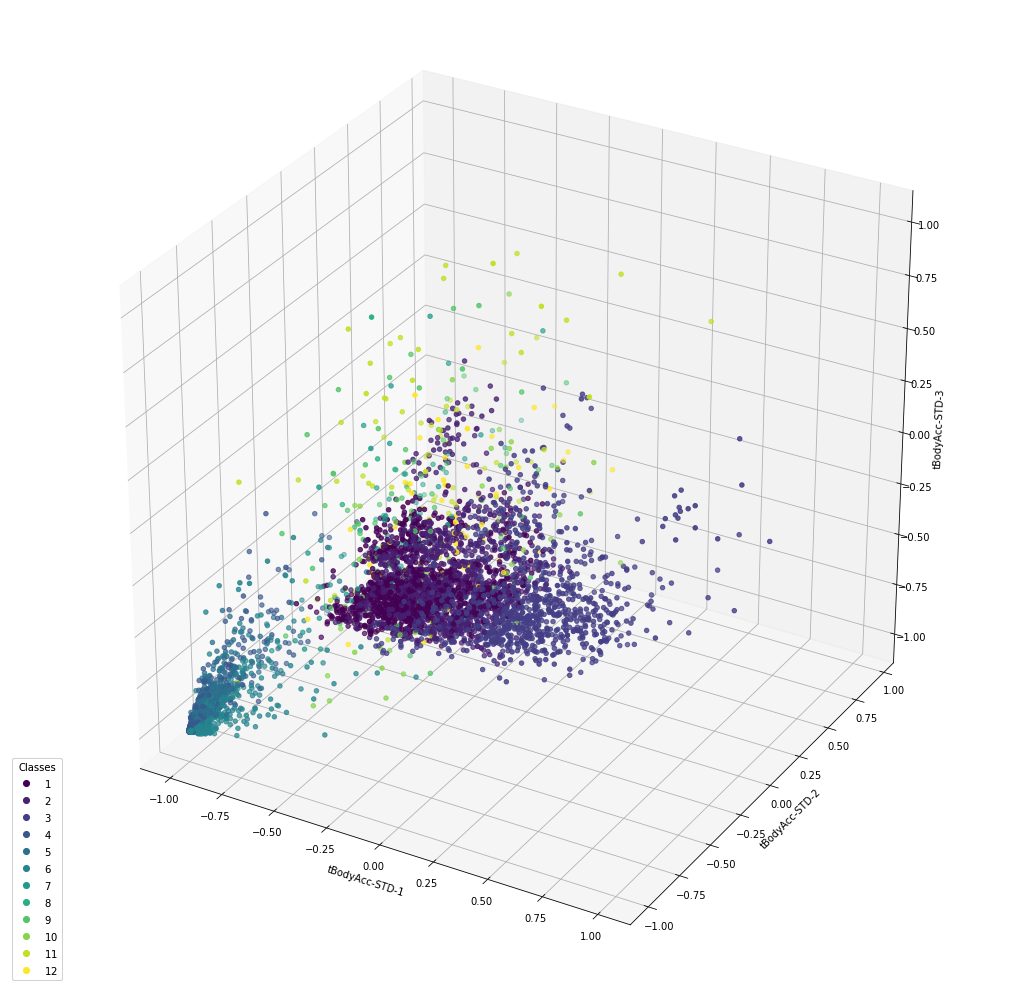

In [8]:
fig = matplotlib.pyplot.figure(figsize=[18, 18])
ax_1 = matplotlib.pyplot.axes(projection='3d')
scatter = ax_1.scatter3D(X_train['tBodyAcc-STD-1'], X_train['tBodyAcc-STD-2'], X_train['tBodyAcc-STD-3'], c=Y_train['Posture'])
ax_1.set_xlabel('tBodyAcc-STD-1')
ax_1.set_ylabel('tBodyAcc-STD-2')
ax_1.set_zlabel('tBodyAcc-STD-3')
legend1 = ax_1.legend(*scatter.legend_elements(), loc="lower left", title="Postures")
ax_1.add_artist(legend1)

Legend


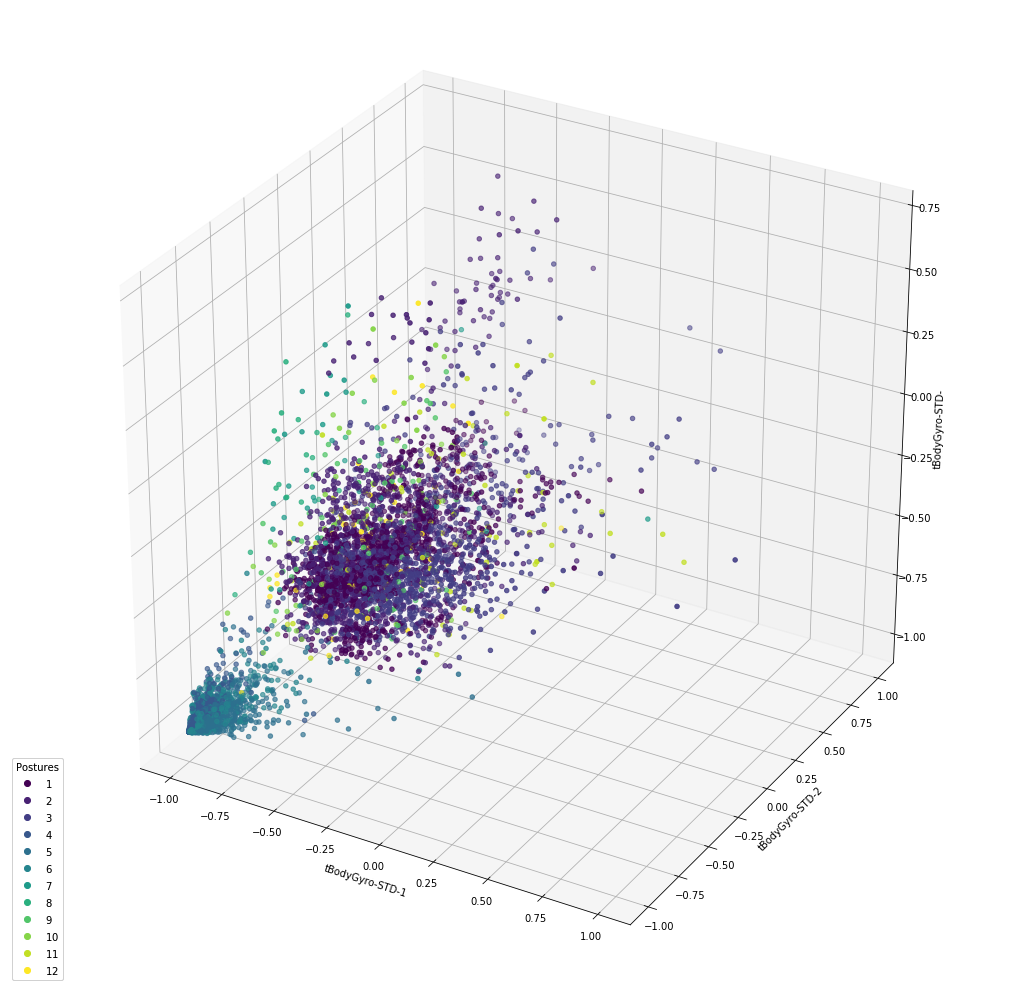

In [15]:
fig_2 = matplotlib.pyplot.figure(figsize=[18, 18])
ax_2 = matplotlib.pyplot.axes(projection='3d')
scatter_2 = ax_2.scatter3D(X_train['tBodyGyro-STD-1'], X_train['tBodyGyro-STD-2'], X_train['tBodyGyro-STD-3'], c=Y_train['Posture'])
ax_2.set_xlabel('tBodyGyro-STD-1')
ax_2.set_ylabel('tBodyGyro-STD-2')
ax_2.set_zlabel('tBodyGyro-STD-3')
legend1 = ax_2.legend(*scatter_2.legend_elements(), loc="lower left", title="Postures")
print(legend1)
ax_2.add_artist(legend1)


# Models

Here, we are working on the classification of the users' postures.

In [10]:
svc_clf = svm.SVC(gamma=0.001, C=100.) # clf = classifier
svc_clf.fit(X_train, Y_train.values.ravel())
Y_svc_pred = svc_clf.predict(X_test)
print("Accuracy score for SVC: {}".format(accuracy_score(Y_test.values.ravel(), Y_svc_pred)))

Accuracy score for SVC: 0.9535104364326376


In [11]:
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, Y_train.values.ravel())
Y_knc_pred = knn.predict(X_test)
print("Accuracy score for KNeighborsClassifier: {}".format(accuracy_score(Y_test.values.ravel(), Y_knc_pred)))

Accuracy score for KNeighborsClassifier: 0.8848829854522454


In [12]:
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, Y_train.values.ravel())
Y_dt_clf_pred = dt_clf.predict(X_test)
print("Accuracy score for DecisionTreeClassifier: {}".format(accuracy_score(Y_test.values.ravel(), Y_dt_clf_pred)))


Accuracy score for DecisionTreeClassifier: 0.812460468058191


In [13]:
gnb_clf = naive_bayes.GaussianNB()
gnb_clf.fit(X_train, Y_train.values.ravel())
Y_gnb_clf_pred = dt_clf.predict(X_test)
print("Accuracy score for GaussianNB: {}".format(accuracy_score(Y_test.values.ravel(), Y_gnb_clf_pred)))


Accuracy score for GaussianNB: 0.812460468058191


# Cross-validation

In [14]:
results = []
models = [svc_clf, knn, dt_clf, gnb_clf]
for model in models:
    kfold = model_selection.StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train.values.ravel(), cv=kfold, scoring='accuracy')
    print(cv_results)
    results.append(cv_results)
print(results)

[0.97554698 0.98198198 0.97168597 0.97812098 0.97812098 0.98198198
 0.97812098 0.98453608 0.97680412 0.9806701 ]
[0.93822394 0.95495495 0.96267696 0.95881596 0.94723295 0.94723295
 0.95109395 0.96134021 0.95489691 0.95876289]
[0.91505792 0.92664093 0.90990991 0.92406692 0.91248391 0.91248391
 0.92535393 0.91494845 0.92654639 0.92654639]
[0.67310167 0.75804376 0.62290862 0.72458172 0.70785071 0.69240669
 0.74002574 0.71005155 0.7628866  0.70876289]
[array([0.97554698, 0.98198198, 0.97168597, 0.97812098, 0.97812098,
       0.98198198, 0.97812098, 0.98453608, 0.97680412, 0.9806701 ]), array([0.93822394, 0.95495495, 0.96267696, 0.95881596, 0.94723295,
       0.94723295, 0.95109395, 0.96134021, 0.95489691, 0.95876289]), array([0.91505792, 0.92664093, 0.90990991, 0.92406692, 0.91248391,
       0.91248391, 0.92535393, 0.91494845, 0.92654639, 0.92654639]), array([0.67310167, 0.75804376, 0.62290862, 0.72458172, 0.70785071,
       0.69240669, 0.74002574, 0.71005155, 0.7628866 , 0.70876289])]


## Evaluate the models